In [510]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as mlt
import numpy as np 
import pandas as pd

bc = load_breast_cancer();

print(bc.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [511]:
bc.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [512]:
bc.data.shape

(569, 30)

# Pre Processing

In [513]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(bc.data,bc.target , test_size=0.2)

In [514]:
print(f"Feature => train :{x_train.shape} - test:{x_test.shape} ")
print(f"Label => train :{y_train.shape} - test:{y_test.shape} ")



Feature => train :(455, 30) - test:(114, 30) 
Label => train :(455,) - test:(114,) 


In [515]:
x_train[0]

array([1.320e+01, 1.582e+01, 8.407e+01, 5.373e+02, 8.511e-02, 5.251e-02,
       1.461e-03, 3.261e-03, 1.632e-01, 5.894e-02, 1.903e-01, 5.735e-01,
       1.204e+00, 1.550e+01, 3.632e-03, 7.861e-03, 1.128e-03, 2.386e-03,
       1.344e-02, 2.585e-03, 1.441e+01, 2.045e+01, 9.200e+01, 6.369e+02,
       1.128e-01, 1.346e-01, 1.120e-02, 2.500e-02, 2.651e-01, 8.385e-02])

# Normalize

In [516]:
from sklearn.preprocessing import  MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [517]:
x_train[0]

array([0.30427125, 0.20662834, 0.28146181, 0.16704136, 0.29322019,
       0.10161953, 0.00342315, 0.01620775, 0.24826482, 0.18913227,
       0.03235475, 0.04714021, 0.02498184, 0.01624586, 0.06523439,
       0.05385605, 0.00284848, 0.04519795, 0.07820679, 0.05658745,
       0.23052295, 0.23989755, 0.20713183, 0.11101553, 0.2749125 ,
       0.11784408, 0.00894569, 0.08591065, 0.21407451, 0.24423533])

# Classification

In [518]:
from sklearn.metrics import  recall_score,precision_score,accuracy_score

def calculate_metrics(y_train,y_test,y_pred_train , y_pred_test):
    acc_train = accuracy_score(y_true=y_train , y_pred=y_pred_train)
    acc_test= accuracy_score(y_true=y_test,y_pred=y_pred_test)

    p =precision_score(y_true=y_test,y_pred=y_pred_test)
    r= recall_score(y_true=y_test,y_pred=y_pred_test)
    print(f"acc train:{acc_train} - acc test:{acc_test} - precision {p} - recall {r}")
    
    return acc_train,acc_test,p,r

# 1.Naive bayes

In [519]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB();
gnb.fit(x_train,y_train)

GaussianNB()

In [520]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train,acc_test,p_gnb,r_gnb = calculate_metrics(y_train,y_test,y_pred_train , y_pred_test)

acc train:0.9428571428571428 - acc test:0.9298245614035088 - precision 0.9305555555555556 - recall 0.9571428571428572


# KNN

In [521]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8 ,algorithm='kd_tree')
knn.fit(x_train , y_train)


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=8)

In [522]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn,acc_test_knn,p_knn,r_knn = calculate_metrics(y_train,y_test,y_pred_train , y_pred_test)

acc train:0.9802197802197802 - acc test:0.956140350877193 - precision 0.9577464788732394 - recall 0.9714285714285714


# Decision Tree

In [523]:
from sklearn.tree import  DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=64 ,min_samples_split=2  )
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=64)

In [524]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt,acc_test_dt,p_dt,r_dt = calculate_metrics(y_train,y_test,y_pred_train , y_pred_test)

acc train:1.0 - acc test:0.956140350877193 - precision 0.9333333333333333 - recall 1.0


# Random Forest

In [525]:
from sklearn.ensemble import  RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000,max_depth=32,min_samples_split=2);
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=32, n_estimators=1000)

In [526]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf,acc_test_rf,p_rf,r_rf = calculate_metrics(y_train,y_test,y_pred_train , y_pred_test)

acc train:1.0 - acc test:0.9736842105263158 - precision 0.971830985915493 - recall 0.9857142857142858


# SVM

In [527]:
from sklearn.svm import SVC 

svm = SVC(kernel='poly' )
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [528]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm,acc_test_svm,p_svm,r_svm = calculate_metrics(y_train,y_test,y_pred_train , y_pred_test)

acc train:0.989010989010989 - acc test:0.956140350877193 - precision 0.9452054794520548 - recall 0.9857142857142858


# Logistic Regression

In [529]:
from sklearn.linear_model import  LogisticRegression

lr = LogisticRegression();
lr.fit(x_train,y_train)

LogisticRegression()

In [530]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr,acc_test_lr,p_lr,r_lr = calculate_metrics(y_train,y_test,y_pred_train , y_pred_test)

acc train:0.9736263736263736 - acc test:0.956140350877193 - precision 0.9333333333333333 - recall 1.0


# ANN

In [531]:
from sklearn.neural_network import  MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=256 , activation='relu' , solver='adam' , batch_size=64)
ann.fit(x_train, y_train)

/home/ali/Documents/Python/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=256)

In [532]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann,acc_test_ann,p_ann,r_ann = calculate_metrics(y_train,y_test,y_pred_train , y_pred_test)

acc train:0.989010989010989 - acc test:0.956140350877193 - precision 0.9452054794520548 - recall 0.9857142857142858


# Comparison

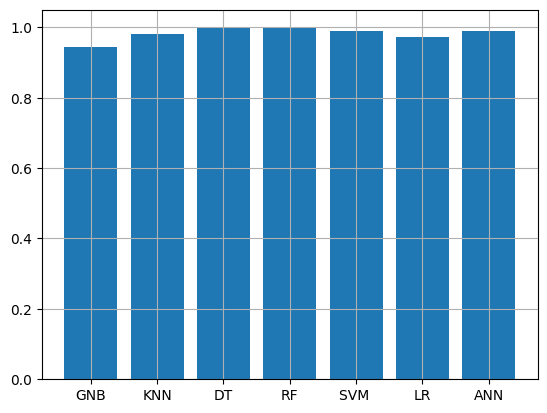

In [533]:
acc_train = [acc_train,acc_train_knn,acc_train_dt,acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann]

title = ['GNB' , 'KNN' , 'DT' , 'RF' , 'SVM ', 'LR' , 'ANN']
mlt.bar(title , acc_train )
mlt.grid()
mlt.show()

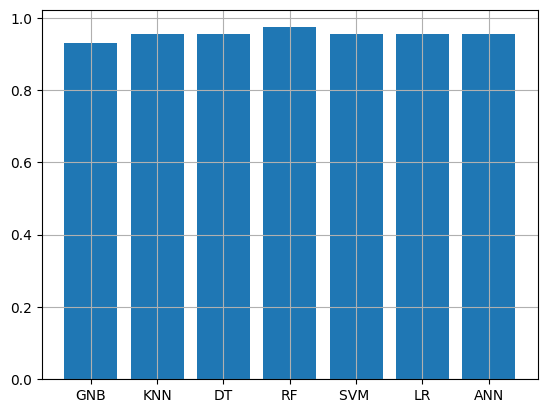

In [534]:
acc_test = [acc_test,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann]

title = ['GNB' , 'KNN' , 'DT' , 'RF' , 'SVM ', 'LR' , 'ANN']
mlt.bar(title , acc_test )
mlt.grid()
mlt.show()

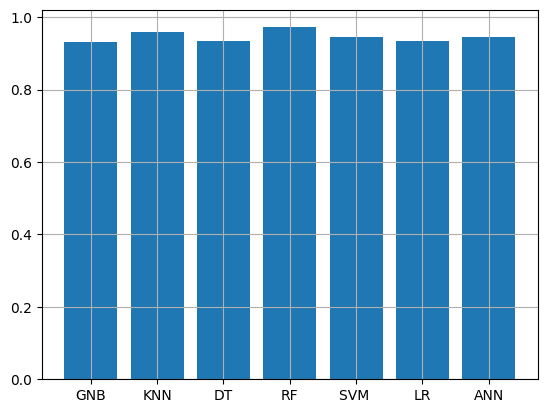

In [535]:
p1 = [p_gnb,p_knn,p_dt,p_rf,p_svm,p_lr,p_ann]

title = ['GNB' , 'KNN' , 'DT' , 'RF' , 'SVM ', 'LR' , 'ANN']
mlt.bar(title , p1 )
mlt.grid()
mlt.show()

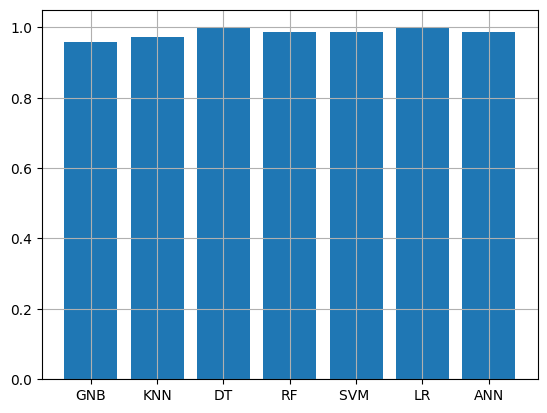

In [536]:
r1 = [r_gnb,r_knn,r_dt,r_rf,r_svm,r_lr,r_ann]

title = ['GNB' , 'KNN' , 'DT' , 'RF' , 'SVM ', 'LR' , 'ANN']
mlt.bar(title , r1 )
mlt.grid()
mlt.show()